# Heart attack analysis

Are we able to predict heart attacks from this dataset ?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

### A look at the data

let's have a look at the data that we have here

First we should higlight the few rowss of the dataset which will lead to not enough relevant results.

In [2]:
df = pd.read_csv('heart.csv')
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The age distribution is homogeneous and near a normal distribution

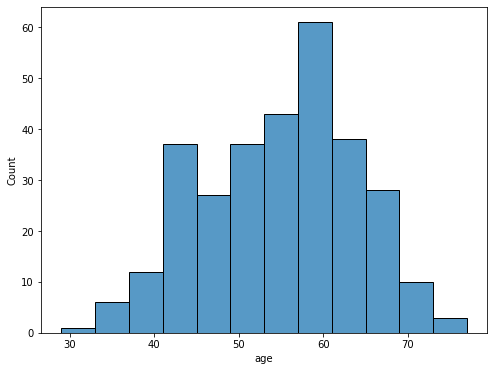

In [3]:
plt.figure(figsize=(8,6))
sns.histplot(data=df['age'])
plt.show()

It is noticeable that there is two times more of a gender than another.

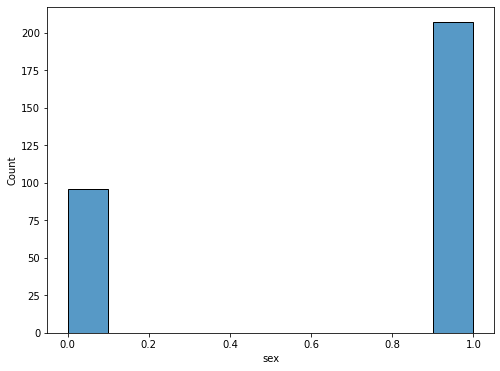

In [4]:
plt.figure(figsize=(8,6))
sns.histplot(x=df['sex'])
plt.show()

### Processing of the data

We quickly process the data, because the overall quality is good. <br>
We just  extract values, apply SMOTE for the imbalance categories and transform the numerical variables to get normalized data and reduce importance of outliers.

In [5]:
from sklearn.preprocessing import  RobustScaler

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

sampling = SMOTE()

X_res, y_res = sampling.fit_resample(X, y)

scaler = RobustScaler()

X_res = scaler.fit_transform(X_res)

df_res =  pd.DataFrame(X_res)
df_res['ouput'] = y_res

In [6]:
df_res

,0,1,2,3,4,5,6,7,8,9,10,11,12,ouput
0,0.538462,0.0,1.25,0.75,-0.126984,1.0,0.0,-0.059701,0.0,0.833333,-1.0,0.0,-1.0,1
1,-1.461538,0.0,0.75,0.00,0.142857,0.0,1.0,1.044776,0.0,1.500000,-1.0,0.0,0.0,1
2,-1.153846,-1.0,0.25,0.00,-0.587302,0.0,0.0,0.597015,0.0,0.333333,1.0,0.0,0.0,1
3,0.000000,0.0,0.25,-0.50,-0.079365,0.0,1.0,0.776119,0.0,0.000000,1.0,0.0,0.0,1
4,0.076923,-1.0,-0.25,-0.50,1.793651,0.0,1.0,0.328358,1.0,-0.111111,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,0.230769,0.0,-0.25,1.15,-1.095238,0.0,0.0,-1.462687,0.0,0.668606,0.0,1.0,-1.0,0
326,0.076923,0.0,-0.25,1.00,0.460317,0.0,0.0,-1.223881,1.0,-0.004620,0.0,0.0,0.0,0
327,0.384615,-1.0,-0.25,0.00,1.412698,0.0,0.0,0.447761,0.0,-0.444444,1.0,0.0,0.0,0
328,0.076923,0.0,0.25,0.30,-0.253968,0.0,0.0,0.537313,0.0,0.936055,1.0,1.0,0.0,0


Afterwrd we split the data to test our predictions. We should still higjlight that we have really few entries in this dataset.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.33, random_state=42)

### Random Forest Classifier
Let's try to predict using RFC. <br>
We print the classificaion report of it. <br>
The model is  not that bad with 0.80 total accuracy

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)

preds = rf_model.predict(X_test)

print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        50
           1       0.81      0.81      0.81        59

    accuracy                           0.80       109
   macro avg       0.80      0.80      0.80       109
weighted avg       0.80      0.80      0.80       109



### XGBoosst
Let's try to predict using XGBoost. <br>
We print the classificaion report of it. <br>
The model is  not that bad with 0.79 total accuracy

In [9]:
import xgboost as xgb

model = xgb.XGBClassifier(use_label_encoder=False)

model.fit(X_train, y_train)

pred_model = model.predict(X_test)

print(classification_report(y_test,pred_model))

[12:36:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.79      0.74      0.76        50
           1       0.79      0.83      0.81        59

    accuracy                           0.79       109
   macro avg       0.79      0.79      0.79       109
weighted avg       0.79      0.79      0.79       109



/opt/miniconda3/envs/ML/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### Artificial Neural Network
Let's try to predict using ANN. <br>
We print the classificaion report of it. <br>
The model is  not that bad with 0.79 total accuracy

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

ann = Sequential([
    Dense(units=24, activation='relu'),
    Dense(units=24, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

ann.compile(loss='binary_crossentropy', optimizer='adam')

ann.fit(x=X_train, y=y_train, epochs=100, batch_size=32, validation_data=(X_test,y_test), 
callbacks=EarlyStopping(monitor='val_loss', patience=4))

2022-06-07 12:36:28.411138: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
7/7 [==============================] - 1s 23ms/step - loss: 0.7470 - val_loss: 0.7173
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 0.7162 - val_loss: 0.6969
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6921 - val_loss: 0.6800
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6724 - val_loss: 0.6654
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6538 - val_loss: 0.6514
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6361 - val_loss: 0.6383
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6196 - val_loss: 0.6254
Epoch 8/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6030 - val_loss: 0.6118
Epoch 9/100
7/7 [==============================] - 0s 4ms/step - loss: 0.5865 - val_loss: 0.5972
Epoch 10/100
7/7 [==============================] - 0s 4ms/step - loss: 0.5691 - val_loss: 0.5824
Epoch 11/100
7/7 [==========

<AxesSubplot:>

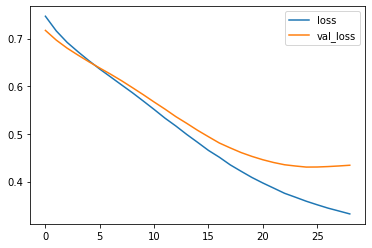

In [11]:
loss_df = pd.DataFrame(ann.history.history)
loss_df.plot()

In [12]:
pred_ann = ann.predict(X_test)
pred_ann

4/4 [==============================] - 0s 1ms/step


array([[0.9385021 ],
       [0.4209893 ],
       [0.07142116],
       [0.94726324],
       [0.93236464],
       [0.3769767 ],
       [0.58580154],
       [0.09431972],
       [0.15887296],
       [0.23572356],
       [0.09640554],
       [0.75156975],
       [0.8111518 ],
       [0.63469344],
       [0.07472079],
       [0.90659565],
       [0.9659584 ],
       [0.85830957],
       [0.88494426],
       [0.90665543],
       [0.5766299 ],
       [0.13917139],
       [0.74655855],
       [0.2783517 ],
       [0.46837118],
       [0.4160019 ],
       [0.08874772],
       [0.04001078],
       [0.78941846],
       [0.20220646],
       [0.0195595 ],
       [0.02325778],
       [0.46119088],
       [0.1051579 ],
       [0.0801407 ],
       [0.637614  ],
       [0.86192256],
       [0.7764753 ],
       [0.28820843],
       [0.8317474 ],
       [0.1952871 ],
       [0.26431894],
       [0.18037376],
       [0.9416724 ],
       [0.18016203],
       [0.87186044],
       [0.84185517],
       [0.703

In [13]:
prediction =  pred_ann  > 0.5
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77        50
           1       0.80      0.81      0.81        59

    accuracy                           0.79       109
   macro avg       0.79      0.79      0.79       109
weighted avg       0.79      0.79      0.79       109



## Conclusion

For this time the best ML algorithm was RFC with an accuracy of 0.79 on average and a F1 score of 0.81.